# Эллиптические кривые

$Y^2 = X^3 + A \cdot X + B$ - уравнение эллиптической кривой в форме Вейерштрасса.

$\Delta = -16(4A^3 + 27B^2)$

In [3]:
F = RR
A.<x,y>=F[]

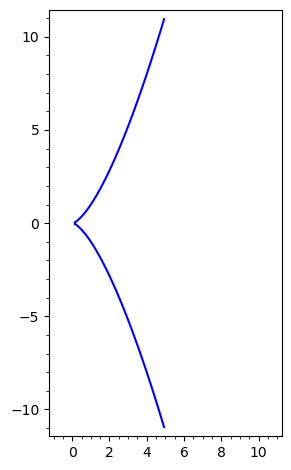

In [4]:
C=Curve(y^2-x^3)
C.plot()

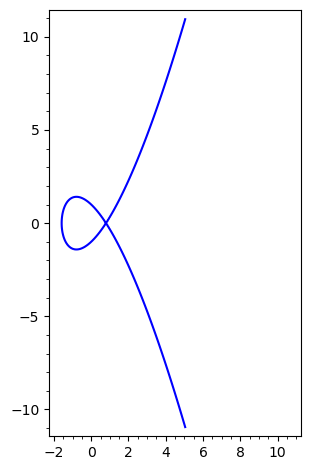

In [5]:
b = 1
a = -(27 * b^2 / 4)^(1/3).n()
C=Curve(y^2 - x^3 - a * x - b)
C.plot()

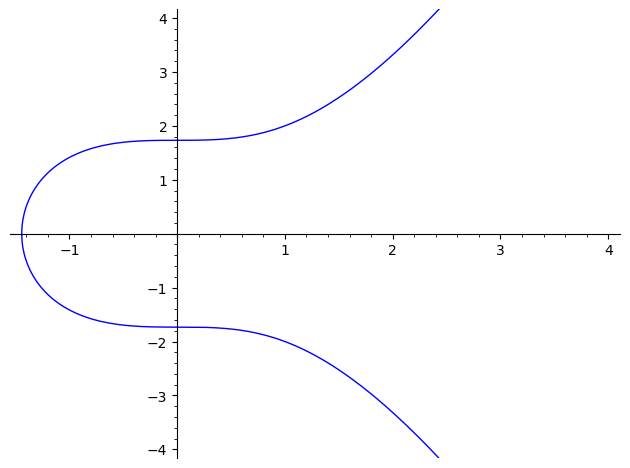

In [6]:
E = EllipticCurve(RR, [0, 3])
E.plot(xmin=-5, xmax=4, ymin=-4, ymax=4)

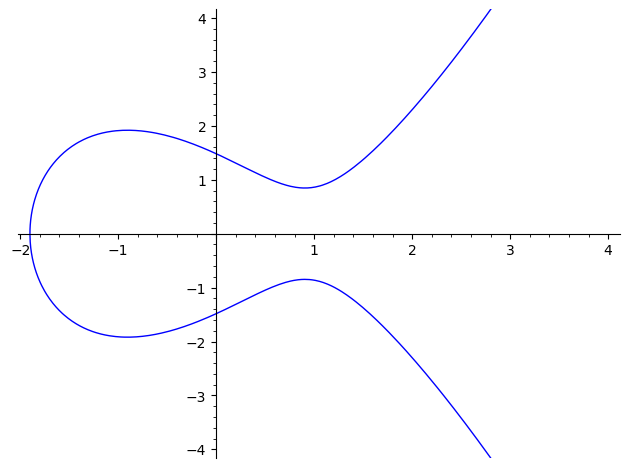

In [7]:
E = EllipticCurve(RR, [-2.457, 2.2])
E.plot(xmin=-5, xmax=4, ymin=-4, ymax=4)

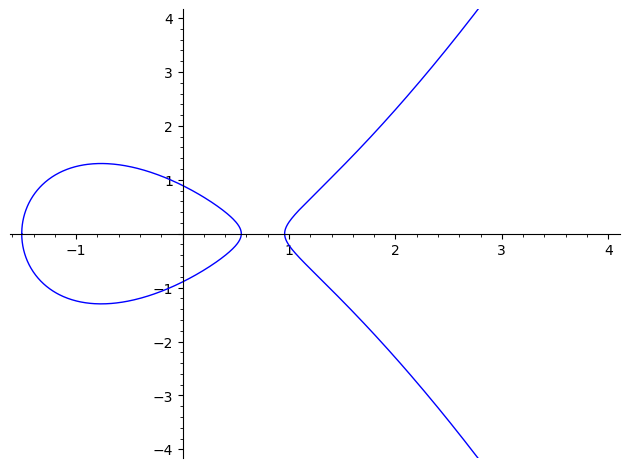

In [8]:
E = EllipticCurve(RR, [-1.754, 0.8])
E.plot(xmin=-5, xmax=4, ymin=-4, ymax=4)

## Теперь рассмотрим как прямая может пересекать эти кривые

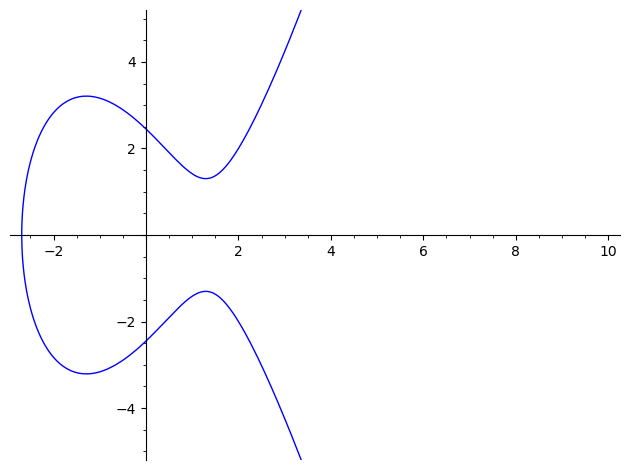

In [9]:
E = EllipticCurve(RR, [-5, 6])
Eplot = E.plot(xmin=-5, xmax=10, ymin=-5, ymax=5)
x = var('x')
Eplot

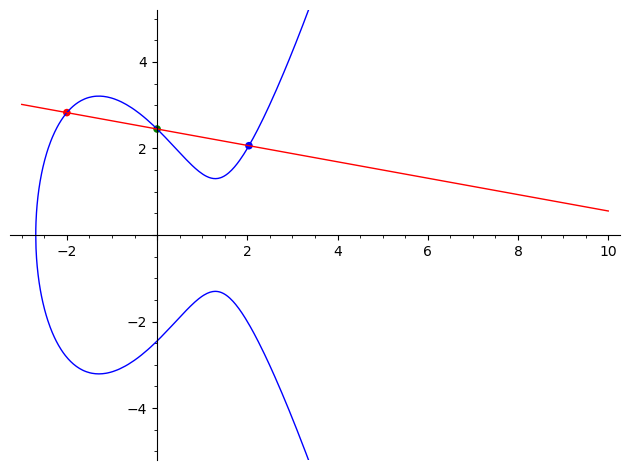

In [10]:
P = E.lift_x(-2.0)
Q = E.lift_x(0.0)
R = -(P + Q)
l = RR(P[1] - Q[1]) / RR(P[0] - Q[0])
y1 = l * (x - P[0]) + P[1]
Eplot + P.plot(color='red', size=30) + Q.plot(color='green', size=30) + R.plot(size=30)  + y1.plot(xmin=-3, xmax=10, color='red')

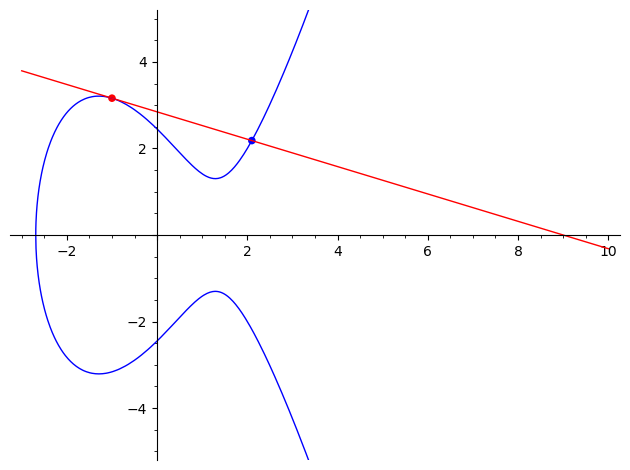

In [11]:
P = E.lift_x(-1.0)
R = -(P + P)
l = RR(3 * P[0]^2 - 5) / RR(2 * P[1])
y1 = l * (x - P[0]) + P[1]
Eplot + P.plot(color='red', size=30) + R.plot(size=30)  + y1.plot(xmin=-3, xmax=10, color='red')

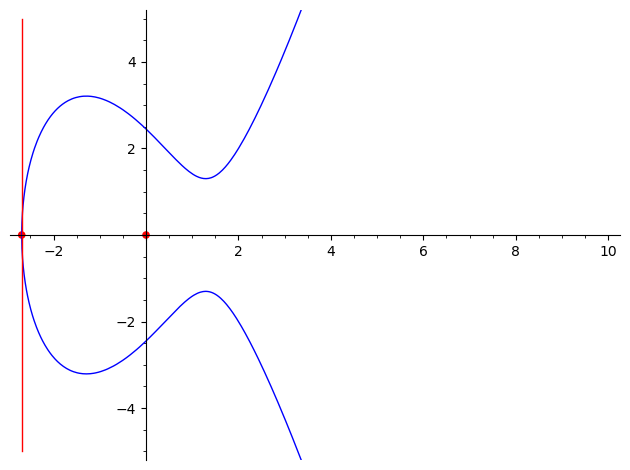

In [12]:
xl = (x^3 - 5 * x + 6).roots()[1][0].n()
P = E.lift_x(xl)
Eplot + line([(xl, -5), (xl, 5)], color='red') + P.plot(size=30, color='red')

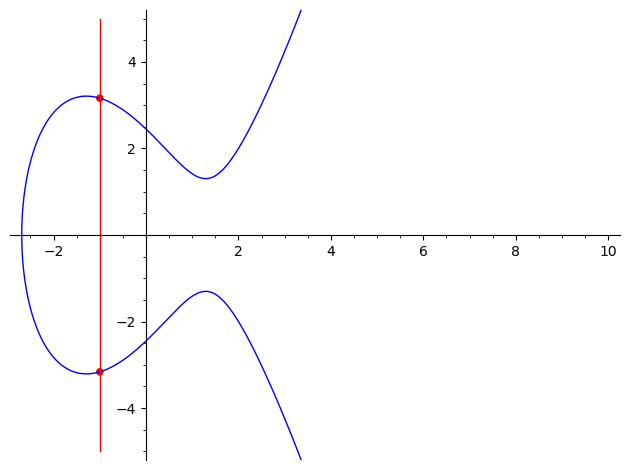

In [13]:
xl = -1
P = E.lift_x(xl)
Eplot + line([(xl, -5), (xl, 5)], color='red') + P.plot(size=30, color='red') + (-P).plot(size=30, color='red')

## Сложение точек

$P = (x_p, y_p)$
- $Q = O$  => $P + Q = P$
- $Q = (x_p, -y_p)$ => $P + Q = O$ 
- $Q \ne P$ => $\lambda = \frac{y_p - y_q}{x_p - x_q}$
- $Q = P$ => $\lambda = \frac{3 * x_p^2 + A}{2 * y_p}$

$x_r = \lambda^2 - x_p - x_q$

$y_r = \lambda(x_p - x_r) - y_p$

Проверка:

In [4]:
xp, xq, a, b, = var("xp xq a b")
yp = sqrt(xp^3 + a * xp + b)
yq = sqrt(xq^3 + a * xq + b)

lam = (yp - yq) / (xp - xq)
xr = lam^2 - xp - xq
yr = lam*(xp - xr) - yp

left = yr^2
right = xr^3 + a * xr + b

assert factor(left - right) == 0

lam = (3 * xp^2 + a) / (2 * yp) 
xr = lam^2 - xp - xp
yr = lam*(xp - xr) - yp

left = yr^2
right = xr^3 + a * xr + b

assert factor(left - right) == 0

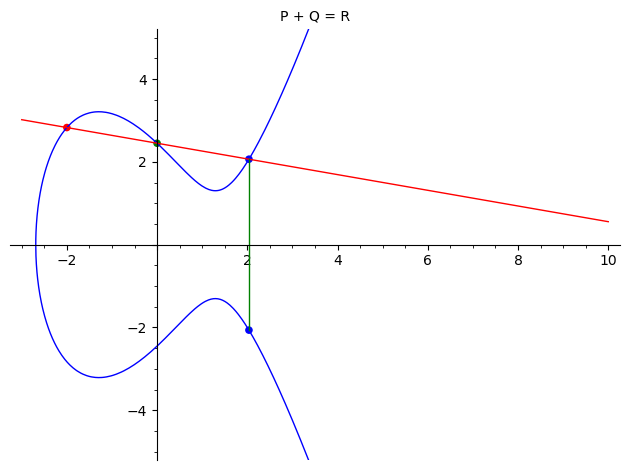

In [36]:
P = E.lift_x(-2.0)
Q = E.lift_x(0.0)
R = -(P + Q)
l = RR(P[1] - Q[1]) / RR(P[0] - Q[0])
y1 = l * (x - P[0]) + P[1]
resplot = Eplot + P.plot(color='red', size=30, title='P + Q = R') + Q.plot(color='green', size=30)  + R.plot(size=30)  + (-R).plot(size=30)
resplot += y1.plot(xmin=-3, xmax=10, color='red')  + line([R.xy(), (-R).xy()], color='green')
resplot

### В качестве наглядного примера можно посмотреть на эллиптическую кривую, но уже над полем рациональных чисел.

In [45]:
E = EllipticCurve(QQ, [0, 3])
print(E)
P = E((1, 2))
print(P)
print(P + P)
Q = P + P
print(Q + P)

Elliptic Curve defined by y^2 = x^3 + 3 over Rational Field
(1 : 2 : 1)
(-23/16 : -11/64 : 1)
(1873/1521 : -130870/59319 : 1)


In [6]:
x, y = -23/16, -11/64
y^2, x^3 + 3

(121/4096, 121/4096)

# Чуть дальше чем действительные числа

$E(F_p) = \{(x, y) | x, y \in F_p, y^2 = x^3 + a * x + b\}$

$F_p$ - некоторое конечное поле порядка $p$. В общем случае $p = q^e$, но мы рассмотрим только вариант, когда $e = 1$.



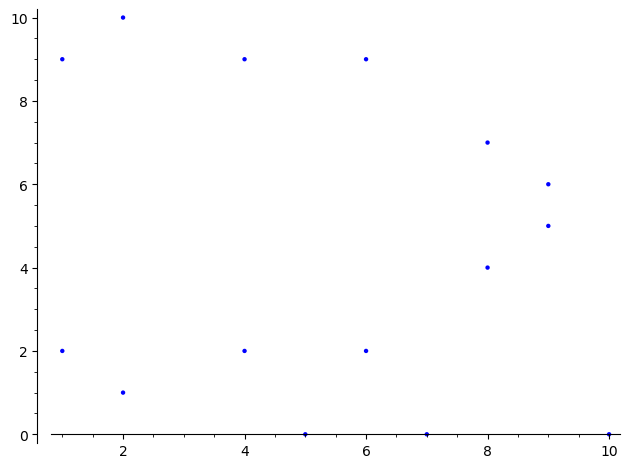

In [51]:
p = 11
Fp = GF(p)
E = EllipticCurve(Fp, [1, 2])
E.plot()

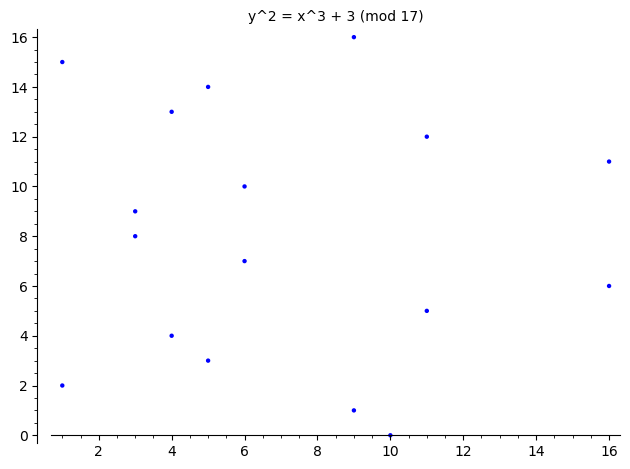

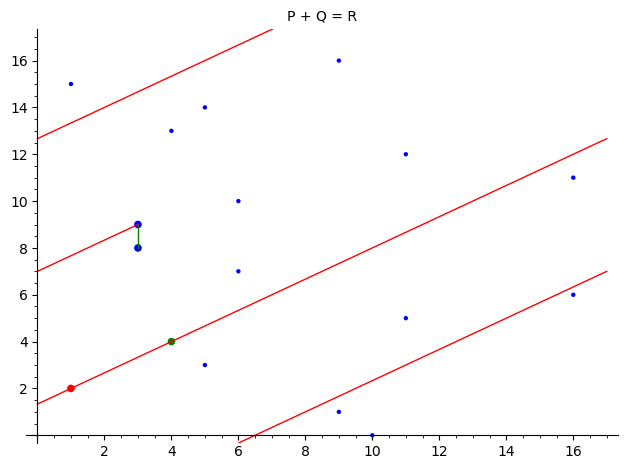

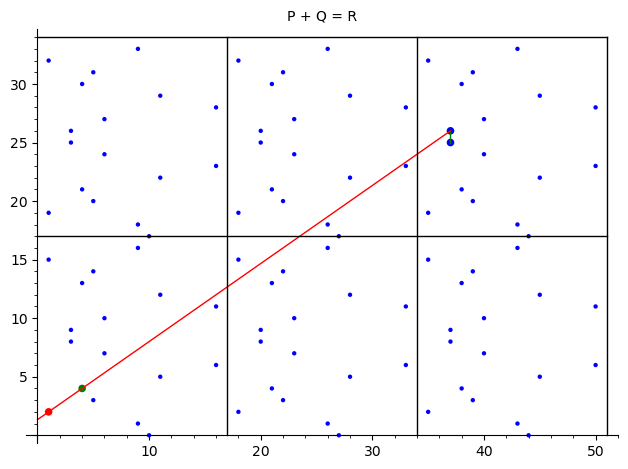

In [172]:
p = 17
Fp = GF(p)
E = EllipticCurve(Fp, [0, 3])
E.plot(title="y^2 = x^3 + 3 (mod 17)").show()
P = E.lift_x(1)
Q = E.lift_x(4)

R = (P + Q)
xr, yr = R.xy()

l = (Integer(P[1]) - Integer(Q[1])) / (Integer(P[0]) - Integer(Q[0]))

x = var('x')
y1 = l * (x - Integer(P[0])) + Integer(P[1])
y2 = y1

P = point([int(P[0]), int(P[1])], color='red', size=30)
Q = point([int(Q[0]), int(Q[1])], color='green', size=30)
Rn = point([int(R[0]), int(-R[1])], size=30)
R = point([int(R[0]), int(R[1])], size=30)

resplot = E.plot(title='P + Q = R') + P + Q + R + Rn
resplot += y1.plot(xmin=0, xmax=17, color='red') 

y0 = y1(x=p)
while True:
    if y1(x=p) < p:
        y1 += y1(x=p) - y1(x=0)
    else:
        t = (y1 - p).roots()[0][0]
        y1 -= y1(x=t)

    if y1(x=int(xr)) == Integer(-yr):
        resplot += y1.plot(ymin=0, xmin=0, xmax=int(xr), color='red')
        break
    else:
        resplot += y1.plot(ymin=0,xmin=0, xmax=p, ymax=p, color='red') 

resplot += line([(int(xr), int(yr)), (int(xr), int(-yr))], color='green')
resplot.show()

a = [x.xy() for x in list(E)[1:]]
b = []
for x0, x1 in a:
    b.append((int(x0) + 17, int(x1)))
    b.append((int(x0), int(x1) + 17))
    b.append((int(x0) + 17, int(x1) + 17))
    b.append((int(x0) + 34, int(x1)))
    b.append((int(x0) + 34, int(x1) + 17))

R = point([int(xr) + 34, int(yr) + 17], size=30)
Rn = point([int(xr) + 34, 17 - int(yr) + 17], size=30)
resplot = list_plot(a + b, title='P + Q = R') + P + Q + R + Rn
resplot += y2.plot(xmin=0, xmax=int(xr)+34, color='red') 
resplot += line([(int(xr) + 34, int(yr) + 17), (int(xr) + 34, int(-yr) + 17)], color='green')
resplot += line([(17, 0), (17, 34)], color='black')
resplot += line([(34, 0), (34, 34)], color='black')
resplot += line([(51, 0), (51, 34)], color='black')
resplot += line([(0, 17), (51, 17)], color='black')
resplot += line([(0, 34), (51, 34)], color='black')


resplot

# Другие представления

## Полное уравнение

$y^2 +a_1 x y + a_3 y = x^3 + a_2 x^2 + a_4 x + a_6$

## Форма Лежандра

Если правая часть Вейерштрасса факторизуется, то

$y^2 = (x - e_1) (x - e_2) (x - e_3)$

$y^2 = x_1(x_1 - 1)(x_1 - \lambda), \lambda = (e_3 - e_1)(e_2 - e_1)^{-1}, x_1 = (e_2 - e_1)^{-1} (x - e_1)$


## Кубическое уравнение

Например $x^3 + y^3 + z^3 = 0 \to y_1^2 = x_1^3 - 432$. В саге EllipticCurve_from_cubic

$u^3 + v^3 = -1$

$u = x + y$
$v = x - y$

In [8]:
x, y, z = var('x, y, z')
P = PolynomialRing(FiniteField(7), [x, y, z])
f = P(x^3 + y^3 + z^3)
EllipticCurve_from_cubic(f)

Scheme morphism:
  From: Projective Plane Curve over Finite Field of size 7 defined by x^3 + y^3 + z^3
  To:   Elliptic Curve defined by y^2 + 2*y = x^3 + 1 over Finite Field of size 7
  Defn: Defined on coordinates by sending (x : y : z) to
        (-x : y : 3*y - 2*z)

# Уравнение четвертой степени

$v^2 = a u^4 + b u^3 + cu^2 + du + e, a\ne0$

$(v u^{-2})^2 = d(u^{-3}) + c(u^{-2}) + bu^{-1} + a$

# Пересечение двух квадратичных поверхностей

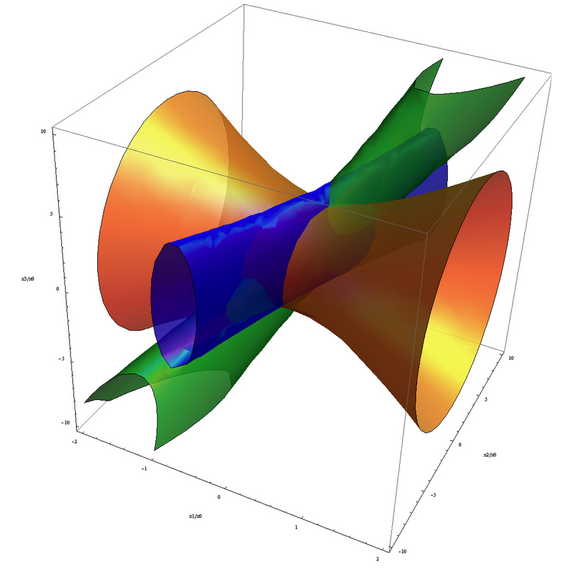

$a u^2 + b v^2 = e$

$c u^2 + d w^2 = f$

# Другие координаты

## Проективные координаты

$y^2 = x^3 + a x + b, x = \frac{x}{z}, y= \frac{y}{z}$

$y^2 z^{-2} = x^3 z^{-3} + a x z^{-1} + b \to z y^2 = x^3 + a z^2 x + bz^3$

$(x: y: z) = (a * x: a * y: a * z)$

Помогает убрать вычисление обратного элемента при сложении

## Координаты Якоби

$(x:y:z) \to (\frac{x}{z^2}, \frac{y}{z^3})$


## Координаты Эдвардса

$u^2 + v^2 = c^2(1 + du^2v^2)$

Для сложения и удвоения одна и та же формула

## Координаты Монтгомери

$By^2 = x^3 + Ax^2 + x$

# j Инвариант

$E: y^2 = x^3 + a x + b$

$j(E) = 1728 * (4A^3) (4A^3 + 27B^2)^{-1}$

$j=0: y^2 = x^3 + B$

$j=1728: y^2 = x^3 + Ax$

Кривые с одинаковым $j$ - твисты друг друга


$y^2 = x^3 + 3j(1728 - j)^{-1} x + 2j(1728 - j)^{-1}$

In [37]:
E = EllipticCurve(GF(13), [2, 10])

# A = E.gens()[0] * 9# B = E.gens()[0] * 6

# E = EllipticCurve(GF(13^3), [2, 10])

# E.gens()[0].order(), E.gens()[1].order()

# a1 = E.gens()[0] * 2 * 9 * 13
# a2 = E.gens()[1] * 2 * 9 * 13

# [i * a1 for i in range(3)], [i * a2 for i in range(3)]

((9 : 4 : 1),)

## Задача дискретного логарифма

$Q = P + P + P + ... + P = k * P$

Задача дискретного логарифма - по заданным P, Q найти k.


In [51]:
def add_points(P1, P2):
    x1, y1 = P1
    x2, y2 = P2
    lam = (y2 - y1) / (x2 - x1)
    xr = lam^2 - x1 - x2
    yr = lam * (x1 - xr) - y1
    return (xr, yr)
    
def double_point(P, A):
    x, y = P
    lam = (3 * x^2 + A) / (2 * y)
    xr = lam^2 - x - x
    yr = lam * (x - xr) - y
    return (xr, yr)

x, y, A = var('x y A')
P = (x, y)
P2 = double_point(P, A)
P4 = double_point(P, A)
P5 = add_points(P, P4)
print(expand(P5[0]).numerator())
print(expand(P5[0]).denominator())
print()
print(expand(P5[1]).numerator())
print(expand(P5[1]).denominator())

x^9 + 4/3*A*x^7 + 2/3*A^2*x^5 + 8/9*A*x^4*y^2 + 16/27*A^2*x^2*y^2 + 64/81*y^6 + 8/81*A^3*y^2 - 4/27*(12*y^4 - A^3)*x^3 - 1/81*(96*A*y^4 - A^4)*x
x^8 + 4/3*A*x^6 - 8/3*x^5*y^2 + 2/3*A^2*x^4 - 16/9*A*x^3*y^2 + 16/9*x^2*y^4 + 4/27*A^3*x^2 - 8/27*A^2*x*y^2 + 1/81*A^4

17496*x^12*y + 34992*A*x^10*y - 38880*x^9*y^3 + 29160*A^2*x^8*y - 51840*A*x^7*y^3 - 25920*A^2*x^5*y^3 + 4096*y^9 + 768*A^3*y^5 + 2592*(12*y^5 + 5*A^3*y)*x^6 + 24*A^6*y + 216*(128*A*y^5 + 15*A^4*y)*x^4 - 1152*(12*y^7 + 5*A^3*y^3)*x^3 + 144*(56*A^2*y^5 + 3*A^5*y)*x^2 - 96*(96*A*y^7 + 5*A^4*y^3)*x
8*(81*x^8 + 108*A*x^6 - 216*x^5*y^2 + 54*A^2*x^4 - 144*A*x^3*y^2 + 144*x^2*y^4 + 12*A^3*x^2 - 24*A^2*x*y^2 + A^4)*(9*x^4 + 6*A*x^2 - 12*x*y^2 + A^2)


In [52]:
p = random_prime(2**256)
g = GF(p)

a = g.random_element()

a^(p - 1) == 1

E = EllipticCurve(GF(p), [0, 3])

G = E((1, 2))

In [56]:
-E.lift_x(1)

(1 : 88130372321456384390679688337713764227903577407743960474417754555186417663375 : 1)

In [57]:
p - 2

88130372321456384390679688337713764227903577407743960474417754555186417663375

In [54]:
P1 = 3
P2 = 19
P5 = 38737
P15 = 637677991750717
P20 = 57205580621648060101
P37 = 1094170343070601245168412032075999583

P37.bit_length()

120

## Порядок кривой

Как и с группами, порядок - количество элементов в группе. В общем случае он отличается от порядка поля.

$|E(F_p)| = n$

Так же у каждой точки есть свой порядок.

$r = ord(G)$ для наименьшего такого $r: r * G = O$

Так же выделяют подгруппы порядка $r$: $E(F_p)[r] = \{P \in E(F_p) | r * P = O\}$

In [58]:
p = random_prime(2**178)
a = randint(1, p-1)
b = randint(1, p-1)
E = EllipticCurve(GF(p), [a, b])

G = E.random_point()

print(E)
print(f'|E| = {E.order()} = {factor(E.order())}')
print(f"{p = }")
print(f'ord(G) = {factor(G.order())}')

assert E.order() * G == E((0, 1, 0))
assert G.order() * G == E((0, 1, 0))
assert E.order() % G.order() == 0

Elliptic Curve defined by y^2 = x^3 + 110198340798596814103316327410147296817499834509458534*x + 64781751666887242504046230190626905693728857367786305 over Finite Field of size 172390890904600186055925403092945701708404913253392401
|E| = 172390890904600186055925402836006987680232711891075105 = 5 * 19 * 223 * 2111 * 15139 * 4300536230030251 * 59207648470310182306849727
p = 172390890904600186055925403092945701708404913253392401
ord(G) = 5 * 19 * 223 * 2111 * 15139 * 4300536230030251 * 59207648470310182306849727


# Теорема Хассе

$q = p^e$

$|q + 1 - |E(F_q)|| \le 2 \sqrt{q}$

$E(F_q) = q + 1 - a, a -$ след(trace) Фробиниуса

# Базис Эллиптической кривой над конечным полем

$E(F_q) = <G_1, G_2>$ (может быть третий, но это мы не будем затрагивать)

$E(F_q) \cong Z_{p^e} + Z_{n_1} + Z_{n_2}$

$|E(F_q)| = p^e * n_1 * n_2, n_1 | n_2$

# Характеристический многочлен Фробиниуса

$X^2 - aX + q = 0$

$(x^{q^2}, y^{q^2}) - a(x^q, y^q) + q(x, y) = 0$

$q * (x, y) = -(x^{q^2}, y^{q^2}) + a(x^q, y^q)$

$(x^q, y^q) - \tau (x, y) = 0$

$x^2 = x + 1$

$\phi^2 = \phi + 1$

$\phi^3 = \phi (\phi + 1) = \phi^2 + \phi  = 2 * \phi + 1$

$\phi^2 + \phi^3 = \phi + 1 + 2 * \phi + 1$

$2 = \phi^2 + \phi^3 - 3 * \phi$

In [14]:
p = 101
E = EllipticCurve(GF(p), [1, 17])
a = E.trace_of_frobenius()
E1 = EllipticCurve(GF(p^3), [1, 17])
x, y = E1.random_point().xy()

E1(x, y), E1((x^(p^2), y^(p^2))) - a * E1((x^p, y^p)) + p * E1(x, y)

((15*z3^2 + 44*z3 + 75 : 15*z3^2 + 31*z3 + 33 : 1), (0 : 1 : 0))

## Вычисление результата умножения точки на скаляр

Мы рассмотрим два подхода
Для Q = O

1. Представим n в бинарном виде. Обрабатывая по очереди биты начиная с верхних:
    - Q = double(Q)
    - Если бит = 1 то дополнительно надо сделать Q = Q + P

Что делать если в бинарном представлении n встречаются длинные подпоследовательности из единиц "...0(1111...1111)0...". В предыдущем алгоритме это бы вылилось в большое количество операций Q + P. Но от них можно избавиться.

$1 + 2 + 2^2 + ... + 2^k = 2^{k + 1} - 1$ - то есть мы можем заменять любые последоавтельности из единиц длины больше 1 [0, 1, 1, 1, 1, 1 ,1 , 1, 1, ..., 1, 1, 0] -> [1, 0, 0, 0, ,0 ,0 ,0 ,0 ,0 ,...,0 ,-1 ,0]

In [59]:
def scalar_multiplication_binary(P, n):
    R = P
    for i in bin(n)[3:]:
        R = R + R
        if i == "1":
            R += P
    return R

p = 11161787065577135861
E = EllipticCurve(GF(p), [1, 17])
P = E.random_point()

n = randint(1, P.order())
Q = n * P
Q1 = scalar_multiplication_binary(P, n)

assert Q == Q1

$\displaystyle\sum_{i=0}^m 2^i = 2^{m + 1} - 1$

$1 + 2 + 4 + 8 = 15 = 16 - 1$

$0b100001111100111011$

$0b100010000-10100-110-1$

In [62]:
def ternary(n):
    n = [int(x) for x in bin(n)[2:]][::-1]
    n += [0]
    j, k = 0, 0
    for i in range(len(n)):
        if n[i] == 1:
            k += 1
            if k == 2:
                n[i - 1] = -1
                n[i] = 0
            elif k > 2:
                n[i] = 0
        else:
            j = i + 1
            if k > 1:
                n[i] = 1
            k = 0
    if n[-1] == 0:
        n = n[:-1]
    return n

def ternary_mul(P, n):
    if n == 0:
        return P * 0
    if n < 0:
        P = - P
        n = -n
    n = ternary(n)
    R = P * 0
    for i in range(len(n)):
        if n[i] == -1:
            R = R - P
        elif n[i] == 1:
            R = R + P
        P = P + P
    return R

assert sum(2**i * c for i, c in enumerate(ternary(n))) == n
print(ternary(n))
print([int(x) for x in bin(n)[2:]][::-1])
Q1 = ternary_mul(P, n)

assert Q == Q1

[-1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, -1, 0, 0, 0, 1, 0, 0, 1, 0, -1, 0, 0, 1, 1, 0, 1, 0, -1, 0, 0, 1, 0, 1, 0, 0, 0, -1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]
[1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]


In [13]:
def constant_time_mul(P, n):
    n = [int(x) for x in bin(n)[2:][::-1]]
    R0, R1 = P, P + P
    for i in range(len(n) - 2, -1, -1):
        if n[i] == 0:
            R0, R1 = R0 + R0, R0 + R1
        else:
            R0, R1 = R0 + R1, R1 + R1
    return R0

Q1 = constant_time_mul(P, n)

assert Q == Q1

#  Baby-step Giant-step

$n = ord(P) = ord(Q)$

$m = \lfloor \sqrt{n} \rfloor$

$Q = k * P = (i * m + j) * P$

$j * P = Q - i * (m * P)$

Заранее вычислим хэш-таблицу : $(j * P, j), j \in [0, 3\sqrt{n}]$ 

Проитерируемся по $i \in [0, \sqrt{n}]$ и проверем есть ли ключ $Q - i * (m * P)$ в таблице.

In [63]:
def bsgs(P, Q, n):
    m = floor(sqrt(n))
    print(f"{m = }")
    precomp = {}
    P0 = P.curve()((0, 1, 0))
    print(P0)
    
    for j in range(m):
        precomp[P0[0]] = j
        P0 += P

    print("Finished precomp")
    
    mP = m * P
    Q0 = Q
    for i in range(m):
        if Q0[0] in precomp:
            t1 = i * m + precomp[Q0[0]]
            t2 = i * m - precomp[Q0[0]]
            if t1 * P == Q:
                return t1 % n
            return t2 % n
        Q0 -= mP
    return None

print(factor(E.order()))
G = E.gens()[0] * (2^3 * 137 * 63559)
m = randint(1, G.order() - 1)
Q = m * G
      
print(bsgs(G, Q, G.order()), m)

2^3 * 137 * 63559 * 160230845209
m = 400288
(0 : 1 : 0)
Finished precomp
32615212020 32615212020


In [68]:
p = next_prime(0xb377a_f0e1_140e1)
F = GF(p)
E = EllipticCurve(F, [2, 1])


# first 
# sc = randint(0, 12308722991)
# P = E.random_point()
# Q = sc * P
P = E.lift_x(22546067865138724)
Q = E.lift_x(14275679085829466)

# second
# sc = ************ * randint(0, 12308722991)
# P = E.random_point()
# Q = sc * P

P = E.lift_x(28800864883662590)
Q = E.lift_x(49227982017119021)

Еще есть $Pollard\ \rho, Pollard\ \lambda$